In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install rouge-score

In [ ]:
!pip install transformers datasets tqdm torch


In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# Load your dataset from Google Drive
df = pd.read_csv("/content/drive/MyDrive/OS-CUM.csv")
df.head()

,ID,PROMPT,RESPONSE,MARKS,FEEDBACK
0,1,Discuss the role of access control lists (ACLs...,Access Control Lists (ACLs) are like digital g...,1,The analogy effectively conveys the role of AC...
1,1,Discuss the role of access control lists (ACLs...,"Think of ACLs as digital bouncers at a club, d...",1,The analogy of bouncers at a club is relatable...
2,1,Discuss the role of access control lists (ACLs...,"ACLs function as virtual traffic cops, trying ...",1,The analogy of traffic cops trying to regulate...
3,1,Discuss the role of access control lists (ACLs...,"Picture ACLs as digital puzzle pieces, attempt...",1,Describing ACLs as digital puzzle pieces attem...
4,1,Discuss the role of access control lists (ACLs...,"ACLs are like digital gateways, attempting to ...",1,Describing ACLs as digital gateways attempting...


In [ ]:
import pandas as pd

# Assuming you have your dataset loaded into a pandas DataFrame called 'df'

# Sample x% of responses from each question
x_percent = 0.80  # You can adjust this value as needed
sampled_data = []

for question_id in range(55):
    # Select x% of responses for each question
    question_data = df[df['ID'] == question_id].sample(frac=x_percent, random_state=42)
    sampled_data.append(question_data)

# Concatenate sampled data into a single DataFrame
dd = pd.concat(sampled_data)

In [ ]:
dd

,ID,PROMPT,RESPONSE,MARKS,FEEDBACK
361,1,Discuss the role of access control lists (ACLs...,"ACLs function as digital visionaries, anticipa...",4,Describing ACLs as digital visionaries anticip...
73,1,Discuss the role of access control lists (ACLs...,"ACLs function as virtual custodians, attemptin...",1,The fourth analogy portrays ACLs as virtual cu...
374,1,Discuss the role of access control lists (ACLs...,"Think of ACLs as digital architects, construct...",4,The metaphor of ACLs as digital architects con...
155,1,Discuss the role of access control lists (ACLs...,"Picture ACLs as digital architects, designing ...",2,Reiterating the picture of ACLs as digital arc...
104,1,Discuss the role of access control lists (ACLs...,ACLs are like digital custodians of file permi...,2,Describing ACLs as digital custodians attempti...
...,...,...,...,...,...
27879,54,Describe the lifecycle of a process and the tr...,A process may enter the Foreground state based...,5,"The transition to the ""Foreground State"" based..."
27875,54,Describe the lifecycle of a process and the tr...,The Polling state involves processes actively ...,5,"The concept of ""Polling State"" is well-articul..."
27782,54,Describe the lifecycle of a process and the tr...,Processes may transition between Local and Rem...,4,"""Suspended Animation"" as a state for temporary..."
27681,54,Describe the lifecycle of a process and the tr...,The Interrupted state occurs when a process is...,3,"The ""Interrupted State"" is effectively conveye..."


In [ ]:
dd.columns

Index(['ID', 'PROMPT', 'RESPONSE', 'MARKS', 'FEEDBACK'], dtype='object')

In [ ]:
dd=dd.drop(['ID','MARKS'],axis=1)

In [ ]:
dd.columns

Index(['PROMPT', 'RESPONSE', 'FEEDBACK'], dtype='object')

In [ ]:
ddd=dd.dropna()

In [ ]:
print(ddd.isnull().sum())

PROMPT      0
RESPONSE    0
FEEDBACK    0
dtype: int64


In [ ]:
dd.shape

(22354, 3)

In [ ]:
data = dd.reset_index(drop=True)
data

,PROMPT,RESPONSE,FEEDBACK
0,Discuss the role of access control lists (ACLs...,"ACLs function as digital visionaries, anticipa...",Describing ACLs as digital visionaries anticip...
1,Discuss the role of access control lists (ACLs...,"ACLs function as virtual custodians, attemptin...",The fourth analogy portrays ACLs as virtual cu...
2,Discuss the role of access control lists (ACLs...,"Think of ACLs as digital architects, construct...",The metaphor of ACLs as digital architects con...
3,Discuss the role of access control lists (ACLs...,"Picture ACLs as digital architects, designing ...",Reiterating the picture of ACLs as digital arc...
4,Discuss the role of access control lists (ACLs...,ACLs are like digital custodians of file permi...,Describing ACLs as digital custodians attempti...
...,...,...,...
22349,Describe the lifecycle of a process and the tr...,A process may enter the Foreground state based...,"The transition to the ""Foreground State"" based..."
22350,Describe the lifecycle of a process and the tr...,The Polling state involves processes actively ...,"The concept of ""Polling State"" is well-articul..."
22351,Describe the lifecycle of a process and the tr...,Processes may transition between Local and Rem...,"""Suspended Animation"" as a state for temporary..."
22352,Describe the lifecycle of a process and the tr...,The Interrupted state occurs when a process is...,"The ""Interrupted State"" is effectively conveye..."


In [ ]:
dataset = pd.DataFrame(data)
dataset

,PROMPT,RESPONSE,FEEDBACK
0,Discuss the role of access control lists (ACLs...,"ACLs function as digital visionaries, anticipa...",Describing ACLs as digital visionaries anticip...
1,Discuss the role of access control lists (ACLs...,"ACLs function as virtual custodians, attemptin...",The fourth analogy portrays ACLs as virtual cu...
2,Discuss the role of access control lists (ACLs...,"Think of ACLs as digital architects, construct...",The metaphor of ACLs as digital architects con...
3,Discuss the role of access control lists (ACLs...,"Picture ACLs as digital architects, designing ...",Reiterating the picture of ACLs as digital arc...
4,Discuss the role of access control lists (ACLs...,ACLs are like digital custodians of file permi...,Describing ACLs as digital custodians attempti...
...,...,...,...
22349,Describe the lifecycle of a process and the tr...,A process may enter the Foreground state based...,"The transition to the ""Foreground State"" based..."
22350,Describe the lifecycle of a process and the tr...,The Polling state involves processes actively ...,"The concept of ""Polling State"" is well-articul..."
22351,Describe the lifecycle of a process and the tr...,Processes may transition between Local and Rem...,"""Suspended Animation"" as a state for temporary..."
22352,Describe the lifecycle of a process and the tr...,The Interrupted state occurs when a process is...,"The ""Interrupted State"" is effectively conveye..."


In [ ]:
# Load the GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
# Concatenate 'PROMPT' and 'RESPONSE' columns into a single list of strings
texts = dataset.apply(lambda x: x['PROMPT'] + " " + x['RESPONSE'], axis=1).tolist()

# Add a padding token to the tokenizer
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

# Set the tokenizer's padding token
tokenizer.pad_token = tokenizer.eos_token
# Tokenize the concatenated texts
tokenized_data = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')


In [ ]:
# Create a custom dataset class
class MyDataset(Dataset):
    def __init__(self, tokenized_data):
        self.input_ids = tokenized_data['input_ids']
        self.attention_mask = tokenized_data['attention_mask']

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {'input_ids': self.input_ids[idx], 'attention_mask': self.attention_mask[idx]}

In [ ]:

# Create dataset and dataloader
batch_size = 4  # Set batch size
dataset = MyDataset(tokenized_data)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

In [ ]:

# Fine-tune the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [ ]:
num_epochs = 10

In [ ]:
model.train()
batch_losses = []
rouge_scores = []
bert_scores = []
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
num_epochs = 10  # Number of epochs
for epoch in range(num_epochs):
    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = input_ids.clone()

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_losses.append(loss.item())

    # Print epoch loss and scores
    print(f"Epoch {epoch+1}/{num_epochs} -> Train loss: {sum(batch_losses[-len(dataloader):]) / len(dataloader):.4f}")

Epoch 1/10 -> Train loss: 0.4869
Epoch 2/10 -> Train loss: 0.2763
Epoch 3/10 -> Train loss: 0.2128
Epoch 4/10 -> Train loss: 0.1763
Epoch 5/10 -> Train loss: 0.1519
Epoch 6/10 -> Train loss: 0.1346
Epoch 7/10 -> Train loss: 0.1220
Epoch 8/10 -> Train loss: 0.1128
Epoch 9/10 -> Train loss: 0.1056
Epoch 10/10 -> Train loss: 0.1000


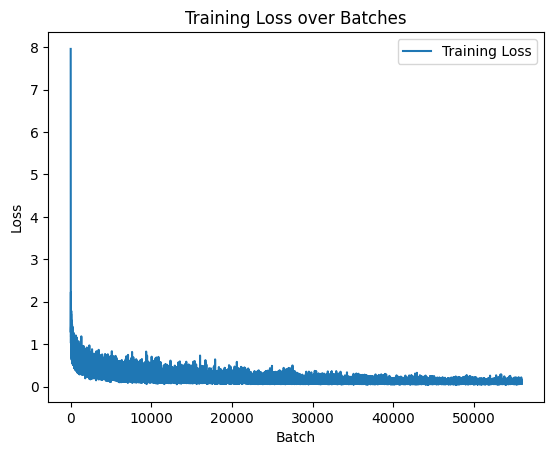

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training loss
plt.plot(batch_losses, label='Training Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Training Loss over Batches')
plt.legend()
plt.show()


In [ ]:
# Save the fine-tuned model
model.save_pretrained('/content/drive/MyDrive/Colab Notebooks/gpt2_fine_tuned_model_15epochs_9100_3')

In [ ]:
def generate_feedback(question, response):
    # Concatenate the question and response
    input_text = f"Question: {question}\nResponse: {response}\nFeedback:"
    input_ids = tokenizer.encode(input_text, return_tensors='pt')
    input_ids = input_ids.to(device)
    output_ids = model.generate(input_ids, max_length=200, pad_token_id=tokenizer.eos_token_id)
    feedback = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return feedback

In [ ]:
# Example usage:
question1 ="Discuss the role of access control lists (ACLs) in file permissions."
response1 ="Describing ACLs again as digital gatekeepers highlights their meticulous control over access to specific files or directories. The metaphor effectively conveys their role in preventing unauthorized individuals from compromising data confidentiality."
feedback1 = generate_feedback(question1, response1)
print("Generated feedback 1:", feedback1)
print()

question2 ="What is file compression, and how does it affect file access speed?"
response2 ="The comparison of compression to a digital architect drafting efficient blueprints is clear and relevant. It successfully communicates the optimization of storage for quicker access and building the compressed structure, with the acknowledgment of a momentary delay during decompression."
feedback2 = generate_feedback(question2, response2)
print("Generated feedback 2:", feedback2)
print()



question4 ="Explain the concept of file locking and its role in concurrent access."
response4 ="The virtual parliamentarian analogyenforces rules of order among processes, granting each one a turn to speak (modify) the file without interrupting others."
feedback4 = generate_feedback(question4, response4)
print("Generated feedback 4:", feedback4)
print()

question5 ="What is the purpose of a file handle in file systems?"
response5 ="The digital gate analogy is clear, emphasizing the file handle's role in opening and closing access for processes to maintain order and security."
feedback5 = generate_feedback(question5, response5)
print("Generated feedback 5:", feedback5)
print()



Generated feedback 1: Question: Discuss the role of access control lists (ACLs) in file permissions.
Response: Describing ACLs again as digital gatekeepers highlights their meticulous control over access to specific files or directories. The metaphor effectively conveys their role in preventing unauthorized individuals from compromising data confidentiality.
Feedback: Effective response time is crucial for file access control, ensuring a safe and secure environment for all users.

Generated feedback 2: Question: What is file compression, and how does it affect file access speed?
Response: The comparison of compression to a digital architect drafting efficient blueprints is clear and relevant. It successfully communicates the optimization of storage for quicker access and building the compressed structure, with the acknowledgment of a momentary delay during decompression.
Feedback: Compression is comparable to building a robust system, but sometimes it takes a moment to decompress

Gene

In [ ]:
from nltk.translate.bleu_score import sentence_bleu



In [ ]:
# Example usage:
question1 ="Discuss the role of access control lists (ACLs) in file permissions."
response1 ="Describing ACLs again as digital gatekeepers highlights their meticulous control over access to specific files or directories. The metaphor effectively conveys their role in preventing unauthorized individuals from compromising data confidentiality."
feedback1 = generate_feedback(question1, response1)
references1 = [response1]  # List of reference responses for question 1
bleu_score1 = sentence_bleu(references1, feedback1)
print("Generated feedback 1:", feedback1)
print("BLEU score 1:", bleu_score1)
print()

# Repeat the process for other questions and responses


Generated feedback 1: Question: Discuss the role of access control lists (ACLs) in file permissions.
Response: Describing ACLs again as digital gatekeepers highlights their meticulous control over access to specific files or directories. The metaphor effectively conveys their role in preventing unauthorized individuals from compromising data confidentiality.
Feedback:
BLEU score 1: 0.714282144627574



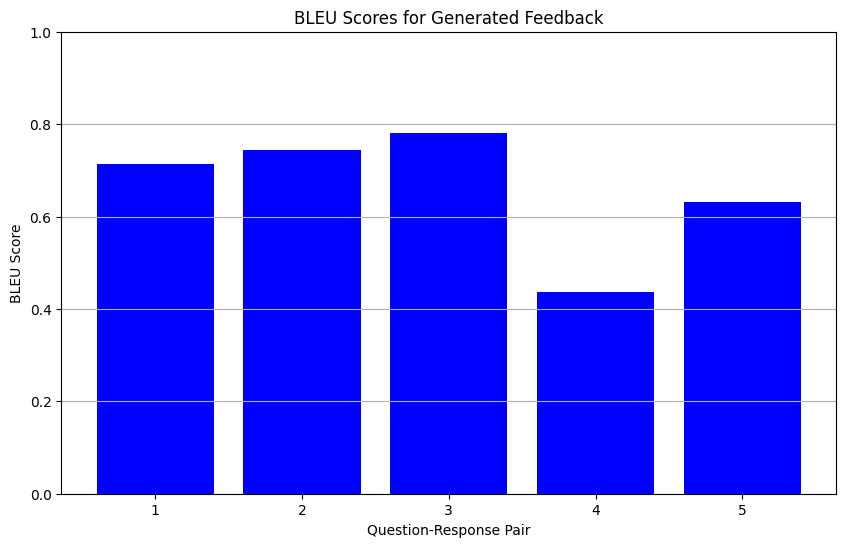

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
import matplotlib.pyplot as plt

# Example usage:
questions = [
    "Discuss the role of access control lists (ACLs) in file permissions.",
    "What is file compression, and how does it affect file access speed?",
    "How does file versioning contribute to data integrity in file systems?",
    "Explain the concept of file locking and its role in concurrent access.",
    "What is the purpose of a file handle in file systems?"
]

responses = [
    "Describing ACLs again as digital gatekeepers highlights their meticulous control over access to specific files or directories. The metaphor effectively conveys their role in preventing unauthorized individuals from compromising data confidentiality.",
    "The comparison of compression to a digital architect drafting efficient blueprints is clear and relevant. It successfully communicates the optimization of storage for quicker access and building the compressed structure, with the acknowledgment of a momentary delay during decompression.",
    "Your response effectively characterizes file compression as a nuanced digital process with meticulous size reduction orchestrated by advanced compression algorithms. The emphasis on brilliantly managed impacts on both storage efficiency and file access speed, strategically minimizing delays during decompression, showcases a strong understanding of the concept.",
    "The virtual parliamentarian analogy enforces rules of order among processes, granting each one a turn to speak (modify) the file without interrupting others.",
    "The digital gate analogy is clear, emphasizing the file handle's role in opening and closing access for processes to maintain order and security."
]

generated_feedback = []
references = []
bleu_scores = []

# Generate feedback and calculate BLEU scores for each question-response pair
for question, response in zip(questions, responses):
    feedback = generate_feedback(question, response)
    reference = [response]
    bleu_score = sentence_bleu(reference, feedback)
    generated_feedback.append(feedback)
    references.append(reference)
    bleu_scores.append(bleu_score)

# Plotting the BLEU scores
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(bleu_scores) + 1), bleu_scores, color='blue')
plt.xlabel('Question-Response Pair')
plt.ylabel('BLEU Score')
plt.title('BLEU Scores for Generated Feedback')
plt.xticks(range(1, len(bleu_scores) + 1))
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


In [ ]:
average_bleu_score = sum(bleu_scores) / len(bleu_scores)

print("Average BLEU Score:", average_bleu_score)

Average BLEU Score: 0.6613638403132217


In [ ]:
from rouge_score import rouge_scorer

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeLsum'], use_stemmer=True)

# Example usage:
questions = [
    "Discuss the role of access control lists (ACLs) in file permissions.",
    "What is file compression, and how does it affect file access speed?",
    "How does file versioning contribute to data integrity in file systems?",
    "Explain the concept of file locking and its role in concurrent access.",
    "What is the purpose of a file handle in file systems?"
]

responses = [
    "Describing ACLs again as digital gatekeepers highlights their meticulous control over access to specific files or directories. The metaphor effectively conveys their role in preventing unauthorized individuals from compromising data confidentiality.",
    "The comparison of compression to a digital architect drafting efficient blueprints is clear and relevant. It successfully communicates the optimization of storage for quicker access and building the compressed structure, with the acknowledgment of a momentary delay during decompression.",
    "Your response effectively characterizes file compression as a nuanced digital process with meticulous size reduction orchestrated by advanced compression algorithms. The emphasis on brilliantly managed impacts on both storage efficiency and file access speed, strategically minimizing delays during decompression, showcases a strong understanding of the concept.",
    "The virtual parliamentarian analogy enforces rules of order among processes, granting each one a turn to speak (modify) the file without interrupting others.",
    "The digital gate analogy is clear, emphasizing the file handle's role in opening and closing access for processes to maintain order and security."
]

generated_feedback = []

# Generate feedback for each question-response pair and calculate ROUGE scores
rouge_scores = []

for question, response in zip(questions, responses):
    feedback = generate_feedback(question, response)
    generated_feedback.append(feedback)
    rouge_score = scorer.score(feedback, response)
    rouge_scores.append(rouge_score)

# Print ROUGE scores
for i, score in enumerate(rouge_scores):
    print(f"ROUGE Scores for question {i+1}: {score}")


ROUGE Scores for question 1: {'rouge1': Score(precision=1.0, recall=0.6888888888888889, fmeasure=0.8157894736842105), 'rouge2': Score(precision=1.0, recall=0.6818181818181818, fmeasure=0.8108108108108109), 'rougeLsum': Score(precision=1.0, recall=0.6888888888888889, fmeasure=0.8157894736842105)}
ROUGE Scores for question 2: {'rouge1': Score(precision=1.0, recall=0.7222222222222222, fmeasure=0.8387096774193548), 'rouge2': Score(precision=1.0, recall=0.7169811320754716, fmeasure=0.8351648351648352), 'rougeLsum': Score(precision=1.0, recall=0.7222222222222222, fmeasure=0.8387096774193548)}
ROUGE Scores for question 3: {'rouge1': Score(precision=1.0, recall=0.6666666666666666, fmeasure=0.8), 'rouge2': Score(precision=1.0, recall=0.6617647058823529, fmeasure=0.7964601769911505), 'rougeLsum': Score(precision=1.0, recall=0.6666666666666666, fmeasure=0.8)}
ROUGE Scores for question 4: {'rouge1': Score(precision=1.0, recall=0.45098039215686275, fmeasure=0.6216216216216216), 'rouge2': Score(prec

In [ ]:
from rouge_score import rouge_scorer

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeLsum'], use_stemmer=True)

# Example usage:
questions = [
    "Discuss the role of access control lists (ACLs) in file permissions.",
    "What is file compression, and how does it affect file access speed?",
    "How does file versioning contribute to data integrity in file systems?",
    "Explain the concept of file locking and its role in concurrent access.",
    "What is the purpose of a file handle in file systems?"
]

responses = [
    "Describing ACLs again as digital gatekeepers highlights their meticulous control over access to specific files or directories. The metaphor effectively conveys their role in preventing unauthorized individuals from compromising data confidentiality.",
    "The comparison of compression to a digital architect drafting efficient blueprints is clear and relevant. It successfully communicates the optimization of storage for quicker access and building the compressed structure, with the acknowledgment of a momentary delay during decompression.",
    "Your response effectively characterizes file compression as a nuanced digital process with meticulous size reduction orchestrated by advanced compression algorithms. The emphasis on brilliantly managed impacts on both storage efficiency and file access speed, strategically minimizing delays during decompression, showcases a strong understanding of the concept.",
    "The virtual parliamentarian analogy enforces rules of order among processes, granting each one a turn to speak (modify) the file without interrupting others.",
    "The digital gate analogy is clear, emphasizing the file handle's role in opening and closing access for processes to maintain order and security."
]

generated_feedback = []

# Initialize lists to store ROUGE scores
rouge1_scores = []
rouge2_scores = []
rougeL_scores = []

# Generate feedback for each question-response pair and calculate ROUGE scores
for question, response in zip(questions, responses):
    feedback = generate_feedback(question, response)
    generated_feedback.append(feedback)

    # Calculate ROUGE scores
    rouge_score = scorer.score(feedback, response)
    rouge1_scores.append(rouge_score['rouge1'][2])  # F1 score for ROUGE-1
    rouge2_scores.append(rouge_score['rouge2'][2])  # F1 score for ROUGE-2
    rougeL_scores.append(rouge_score['rougeLsum'][2])  # F1 score for ROUGE-L

# Calculate average ROUGE scores
avg_rouge1_score = sum(rouge1_scores) / len(rouge1_scores)
avg_rouge2_score = sum(rouge2_scores) / len(rouge2_scores)
avg_rougeL_score = sum(rougeL_scores) / len(rougeL_scores)

# Print or use average ROUGE scores as needed
print("Average ROUGE-1 F1 score:", avg_rouge1_score)
print("Average ROUGE-2 F1 score:", avg_rouge2_score)
print("Average ROUGE-L F1 score:", avg_rougeL_score)


Average ROUGE-1 F1 score: 0.7836477698828341
Average ROUGE-2 F1 score: 0.7778276078276078
Average ROUGE-L F1 score: 0.7836477698828341


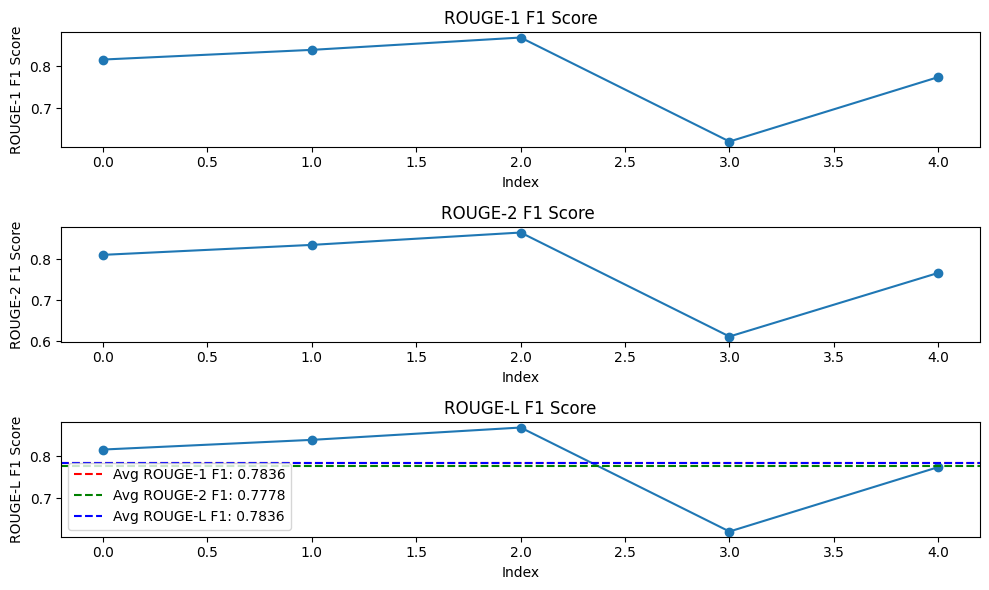

In [ ]:
import matplotlib.pyplot as plt

# Plotting ROUGE scores
plt.figure(figsize=(10, 6))

# Plot individual ROUGE scores
plt.subplot(3, 1, 1)
plt.plot(range(len(rouge1_scores)), rouge1_scores, marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('ROUGE-1 F1 Score')
plt.title('ROUGE-1 F1 Score')

plt.subplot(3, 1, 2)
plt.plot(range(len(rouge2_scores)), rouge2_scores, marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('ROUGE-2 F1 Score')
plt.title('ROUGE-2 F1 Score ')

plt.subplot(3, 1, 3)
plt.plot(range(len(rougeL_scores)), rougeL_scores, marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('ROUGE-L F1 Score')
plt.title('ROUGE-L F1 Score')

# Plot average ROUGE scores
plt.axhline(y=avg_rouge1_score, color='r', linestyle='--', label=f'Avg ROUGE-1 F1: {avg_rouge1_score:.4f}')
plt.axhline(y=avg_rouge2_score, color='g', linestyle='--', label=f'Avg ROUGE-2 F1: {avg_rouge2_score:.4f}')
plt.axhline(y=avg_rougeL_score, color='b', linestyle='--', label=f'Avg ROUGE-L F1: {avg_rougeL_score:.4f}')

plt.legend()

plt.tight_layout()
plt.show()
